1. Point estimates vs. distributions
2. Measures of variance
3. Using resampling (simulation) to bootstrap intuitions about results
4. Questions about Lab Report 1

In [5]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Data from: 
# Hulme, R. C., Begum, A., Nation, K., & Rodd, J. M. (2022). Diversity of narrative context disrupts the early stage of learning the meanings of novel words.
# https://psyarxiv.com/uh9f2/

url = 'https://osf.io/download/r7udh/'

df = pd.read_csv(url)

In [6]:
df.head(10)

,Participant.ID,Version,Set,Subset,Baseword,Diversity,Item,Question,Response.Box,Response,Score
0,1,B2,B,2,shirt,low,hust,Earlier you read about a type of shirt that wa...,1,stretchy,3.0
1,1,B2,B,2,shirt,low,hust,Earlier you read about a type of shirt that wa...,2,can't be torn,NaN
2,1,B2,B,2,shirt,low,hust,Earlier you read about a type of shirt that wa...,3,stain proof,NaN
3,1,B2,B,2,shirt,low,hust,Earlier you read about a type of shirt that wa...,4,NaN,NaN
4,1,B2,B,2,shirt,low,hust,Earlier you read about a type of shirt that wa...,5,NaN,NaN
5,1,B2,B,2,shirt,low,hust,Earlier you read about a type of shirt that wa...,6,NaN,NaN
6,1,B2,B,2,shirt,low,hust,Earlier you read about a type of shirt that wa...,7,NaN,NaN
7,1,B2,B,1,cockroach,high,veak,Earlier you read about a type of cockroach tha...,1,native to New Zealand,2.0
8,1,B2,B,1,cockroach,high,veak,Earlier you read about a type of cockroach tha...,2,smell bad if you tred on them,NaN
9,1,B2,B,1,cockroach,high,veak,Earlier you read about a type of cockroach tha...,3,can infest a house,NaN


In [7]:
df.shape

(5600, 11)

In [10]:
len(set(df['Participant.ID']))

100

<AxesSubplot:xlabel='Score', ylabel='Count'>

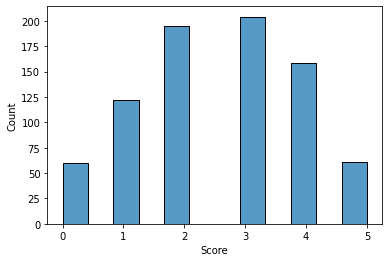

In [11]:
sns.histplot(data = df, x = 'Score')

In [12]:
df = df.dropna()

<AxesSubplot:xlabel='Score', ylabel='Density'>

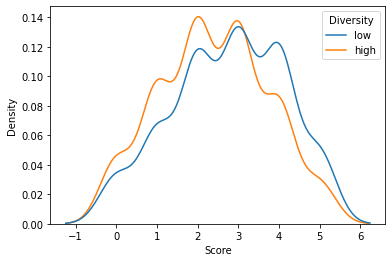

In [13]:
sns.kdeplot(data = df, x = 'Score', hue = 'Diversity')

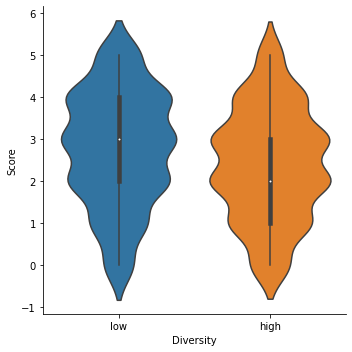

In [14]:
sns.catplot(data = df, x = 'Diversity', y = 'Score', kind = 'violin')

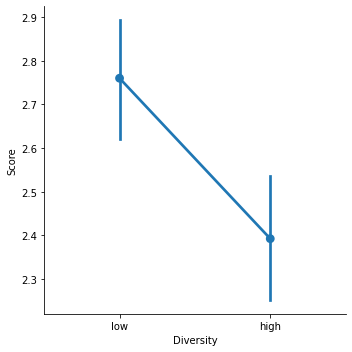

In [15]:
sns.catplot(data = df, x = 'Diversity', y = 'Score', kind = 'point')

In [17]:
import numpy as np

df_low = df.loc[df['Diversity'] == 'low']
df_high = df.loc[df['Diversity'] == 'high']

sim_low = []
for i in range(10):
    sim_low.append(np.random.choice(df_low['Score'], 50, replace = True))

sim_high = []
for i in range(10):
    sim_high.append(np.random.choice(df_high['Score'], 50, replace = True))


In [18]:
sim_high

[array([3., 2., 3., 4., 1., 0., 4., 2., 4., 1., 5., 4., 3., 2., 4., 2., 3.,
        1., 3., 1., 4., 1., 4., 5., 3., 2., 2., 3., 1., 4., 3., 3., 3., 4.,
        1., 5., 3., 5., 4., 5., 3., 1., 1., 3., 2., 3., 1., 1., 3., 3.]),
 array([1., 3., 4., 3., 3., 3., 1., 1., 3., 4., 3., 4., 3., 2., 1., 2., 5.,
        3., 3., 0., 1., 5., 2., 1., 3., 4., 4., 1., 0., 1., 0., 2., 5., 2.,
        2., 2., 3., 3., 0., 2., 1., 1., 3., 3., 4., 3., 1., 1., 2., 2.]),
 array([2., 3., 2., 1., 2., 2., 2., 4., 1., 2., 1., 4., 3., 0., 3., 1., 3.,
        3., 4., 5., 4., 4., 3., 3., 1., 3., 3., 2., 2., 3., 0., 0., 3., 1.,
        1., 3., 3., 0., 1., 3., 0., 3., 1., 2., 2., 2., 3., 2., 4., 1.]),
 array([1., 2., 1., 0., 2., 2., 2., 2., 4., 0., 2., 4., 0., 1., 1., 3., 4.,
        1., 2., 1., 3., 2., 3., 4., 3., 1., 3., 2., 3., 2., 4., 2., 2., 4.,
        3., 5., 3., 2., 2., 1., 3., 2., 2., 0., 5., 3., 3., 4., 3., 2.]),
 array([3., 2., 4., 3., 1., 3., 0., 4., 2., 3., 3., 4., 0., 4., 3., 3., 2.,
        1., 2., 3., 

<AxesSubplot:xlabel='id', ylabel='score'>

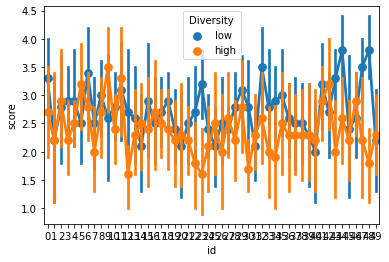

In [19]:
import numpy as np

sim_low = []
for i in range(10):
    sim_low.append(np.random.choice(df_low['Score'], 50, replace = True))

sim_high = []
for i in range(10):
    sim_high.append(np.random.choice(df_high['Score'], 50, replace = True))

sim_data_low = pd.DataFrame(sim_low)
sim_means_low = sim_data_low.mean()

sim_data_high = pd.DataFrame(sim_high)
sim_means_high = sim_data_high.mean()

sim_data_low = sim_data_low.melt(var_name = 'id', value_name = 'score')
sim_data_high = sim_data_high.melt(var_name = 'id', value_name = 'score')

sim_data_low['Diversity'] = ['low']*len(sim_data_low)
sim_data_high['Diversity'] = ['high']*len(sim_data_high)

sim_data_long = pd.concat([sim_data_low,sim_data_high])

sns.pointplot(data = sim_data_long, x = 'id', y = 'score', hue = 'Diversity', linestyle = ' ')




In [20]:
sim_low = []
for i in range(10):
    sim_low.append(np.random.choice(df_low['Score'], 50, replace = True))

sim_high = []
for i in range(10):
    sim_high.append(np.random.choice(df_high['Score'], 50, replace = True))

sim_data_low = pd.DataFrame(sim_low)
sim_means_low = sim_data_low.mean()

sim_data_high = pd.DataFrame(sim_high)
sim_means_high = sim_data_high.mean()

sim_data_low = sim_data_low.melt(var_name = 'id', value_name = 'score')
sim_data_high = sim_data_high.melt(var_name = 'id', value_name = 'score')

sim_data_low['Diversity'] = ['low']*len(sim_data_low)
sim_data_high['Diversity'] = ['high']*len(sim_data_high)

sim_data_long = pd.concat([sim_data_low,sim_data_high])

#sns.pointplot(data = sim_data_long, x = 'id', y = 'score', hue = 'Diversity', linestyle = ' ')

sim_data_long = sim_data_long.groupby(['id', 'Diversity']).mean()
sim_data_long.reset_index(inplace = True)
sim_data_long

,id,Diversity,score
0,0,high,3.1
1,0,low,3.4
2,1,high,2.6
3,1,low,2.8
4,2,high,2.6
...,...,...,...
95,47,low,2.9
96,48,high,2.1
97,48,low,2.4
98,49,high,2.5


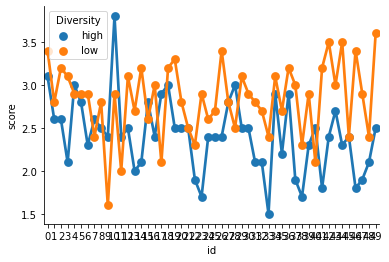

In [21]:
sns.pointplot(data = sim_data_long, 
              x = 'id', 
              y = 'score', 
              hue = 'Diversity')
sns.despine()

In [22]:
compare = zip(sim_data_long.loc[sim_data_long['Diversity'] == 'high']['score'],
              sim_data_long.loc[sim_data_long['Diversity'] == 'low']['score'])
compare = list(compare)
compare

[(3.1, 3.4),
 (2.6, 2.8),
 (2.6, 3.2),
 (2.1, 3.1),
 (3.0, 2.9),
 (2.8, 2.9),
 (2.3, 2.9),
 (2.6, 2.4),
 (2.5, 2.8),
 (2.4, 1.6),
 (3.8, 2.9),
 (2.4, 2.0),
 (2.5, 3.1),
 (2.0, 2.7),
 (2.1, 3.2),
 (2.8, 2.6),
 (2.4, 3.0),
 (2.9, 2.1),
 (3.0, 3.2),
 (2.5, 3.3),
 (2.5, 2.8),
 (2.5, 2.5),
 (1.9, 2.3),
 (1.7, 2.9),
 (2.4, 2.6),
 (2.4, 2.7),
 (2.4, 3.4),
 (2.8, 2.8),
 (3.0, 2.5),
 (2.5, 3.1),
 (2.5, 2.9),
 (2.1, 2.8),
 (2.1, 2.7),
 (1.5, 2.4),
 (2.9, 3.1),
 (2.2, 2.7),
 (2.9, 3.2),
 (1.9, 3.0),
 (1.7, 2.3),
 (2.3, 2.9),
 (2.5, 2.1),
 (1.8, 3.2),
 (2.4, 3.5),
 (2.7, 3.0),
 (2.3, 3.5),
 (2.4, 2.4),
 (1.8, 3.4),
 (1.9, 2.9),
 (2.1, 2.4),
 (2.5, 3.6)]

In [23]:
highs = [1 for x in compare if x[0]>x[1]]
lows = [1 for x in compare if x[0]<x[1]]
same = [1 for x in compare if x[0]==x[1]]
print(sum(highs))
print(sum(lows))
print(sum(same))


9
38
3
